# Plot data

In [13]:
import sys
sys.path.insert(0,"..")

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import pandas as pd
import numpy as np

from tree.parameters import Ts

# Plot number of equivalent resonances

In [14]:
resonance_radical_df = pd.read_csv("../data/resonance_radicals.csv")
resonance_radical_df

,radical_smiles,resonance_radical_smiles,has_H,has_C,has_N,has_O,Mw (g/mol),num_rings,num_heavy_atoms,num_rotatable_bonds,radical_atom_type
0,[O]C(=O)OC(O)(O)O,[O]C(=O)OC(O)(O)O,True,True,False,True,122.992963,0,8,4,O
1,[O]C(O)(O)OC(=O)O,[O]C(O)(O)OC(=O)O,True,True,False,True,122.992963,0,8,3,O
2,O=C(O)O[C](O)O,O=C(O)O[C](O)O,True,True,False,True,106.998048,0,7,3,C
3,CC(=O)OC(OO)C(=O)C(O)O[O],CC(=O)OC(OO)C(=O)C(O)O[O],True,True,False,True,195.014092,0,13,8,O
4,O=[C]OC(O)(O)O,O=[C]OC(O)(O)O,True,True,False,True,106.998048,0,7,5,C
...,...,...,...,...,...,...,...,...,...,...,...
2804,C1=C[CH]C=1,[C]1=CC=C1,True,True,False,False,51.023475,1,4,0,C
2805,C=C=C1C=[C]C1,C=C=C1C=[C]C1,True,True,False,False,77.039125,1,6,0,C
2806,[CH2]C1=CC#CC1,[CH2]C1=CC#CC1,True,True,False,False,77.039125,1,6,1,C
2807,[CH2]C1=CC#CC1,C=C1[CH]C#CC1,True,True,False,False,77.039125,1,6,0,C


In [15]:
resonance_radical_df["radical_smiles"].value_counts().value_counts()

1    1689
2     458
3      57
4       7
5       1
Name: radical_smiles, dtype: int64

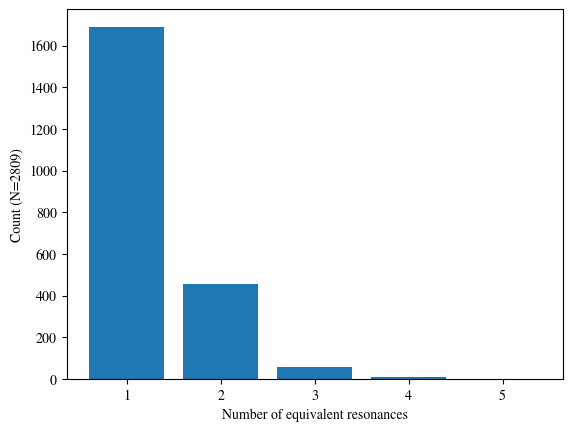

In [16]:
plt.figure()
count_dict = resonance_radical_df["radical_smiles"].value_counts().value_counts()
plt.bar(count_dict.index, count_dict)
plt.ylabel(f"Count (N={len(resonance_radical_df.index)})")
plt.xlabel("Number of equivalent resonances")
plt.savefig("../figures/data_num_resonances.pdf", bbox_inches="tight")

# Plot descriptors

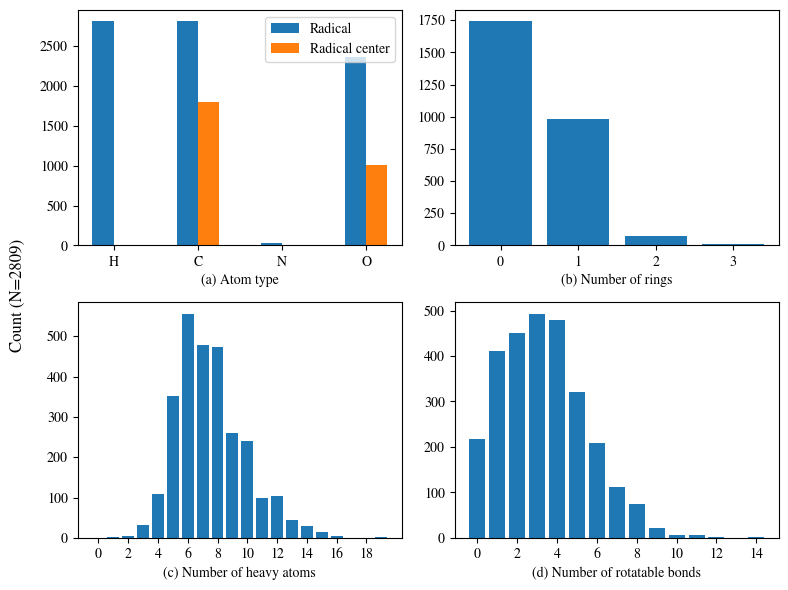

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

ax = axs.flat[0]
width = 0.25
atom_symbol_columns = [column for column in resonance_radical_df.columns if "has_" in column]
atom_symbols = [column.split("has_")[1] for column in atom_symbol_columns]
xs = np.array(range(len(atom_symbols)))
counts = resonance_radical_df["radical_atom_type"].value_counts()
ax.bar(xs, resonance_radical_df[atom_symbol_columns].sum(axis=0), width=width, label="Radical")
ax.bar(xs+width, [counts[atom_symbol] for atom_symbol in atom_symbols], width=width, label="Radical center")
ax.set_xticks(xs+width/2)
ax.set_xticklabels(atom_symbols)
ax.set_xlabel("(a) Atom type")
ax.legend()

ax = axs.flat[1]
counts = resonance_radical_df["num_rings"].value_counts()
xs = range(counts.index.max()+1)
ys = [counts[x] for x in xs]
ax.bar(xs, ys)
ax.set_xlabel("(b) Number of rings")

ax = axs.flat[2]
counts = resonance_radical_df["num_heavy_atoms"].value_counts()
xs = range(counts.index.max()+1)
ys = [counts.get(x, 0.0) for x in xs]
ax.bar(xs, ys)
ax.set_xticks(xs[::2])
ax.set_xlabel("(c) Number of heavy atoms")

ax = axs.flat[3]
counts = resonance_radical_df["num_rotatable_bonds"].value_counts()
xs = range(counts.index.max()+1)
ys = [counts.get(x, 0.0) for x in xs]
ax.bar(xs, ys)
ax.set_xticks(xs[::2])
ax.set_xlabel("(d) Number of rotatable bonds")

fig.supylabel(f"Count (N={len(resonance_radical_df.index)})")
fig.tight_layout()
fig.savefig("../figures/data_radical_descriptors_hist.pdf", bbox_inches="tight")